# Model building
Build a model to predict trip_fare using travel_distance and travel_time. 
Measure the accuracy of the model and use the model to predict trip_fare for a trip with travel_distance of 3.5 kms and travel_time of 15 minutes.



# -------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------

# 1. Import the relevant libraries.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

# 2. Import the dataframe store in df 

In [6]:
df = pd.read_csv('rapido.csv')
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1.546710e+12,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37.0
1,ID002,CUST_002,1.546710e+12,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119.0
2,ID003,CUST_003,1.546710e+12,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27.0
3,ID004,CUST_004,1.546710e+12,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121.0
4,ID005,CUST_005,1.546710e+12,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58.0


# Before creating an ML algorithm first drop all of the rows with a missing value from df.

In [18]:
df = df.dropna()

# 3. Now Create two variable x and y where 'x' belongs to independent variable and 'y' belongs to dependent variable.

In [19]:
x = df[['travel_distance', 'travel_time']]
y = df[['trip_fare']]

# 4. Use scikit-learn’s train_test_split() method to split x into 80% training            set and 20% testing set and generate: 
    • x_train 
    • x_test 
    • y_train 
    • y_test 
Set the random_state to 6.


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2,
random_state=6) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(35669, 2)
(8918, 2)
(35669, 1)
(8918, 1)


 # 5.Create a Linear Regression model and call it regr. Fit the model using x_train and y_train.

In [24]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 6. Use the model to predict 'y' from values x_test.  Store the predictions in a variable called trip_fare_predict

In [30]:
trip_fare_predict = regr.predict(x_test)
trip_fare_predict

array([[63.64803023],
       [37.70520908],
       [60.98015729],
       ...,
       [19.1785182 ],
       [76.95611155],
       [46.58731339]])

In [31]:
x_test

,travel_distance,travel_time
13688,6.199,21.419067
39649,3.281,8.092283
13398,5.890,23.116450
18176,2.052,6.756900
10441,2.087,11.483233
...,...,...
4910,9.787,32.144533
42965,5.855,24.185500
20232,1.179,4.816500
35237,7.683,32.679833


# 7. To see this model in action, let’s test it with travel_distance of 3.5 kms and travel_time of 15 minutes.

In [32]:
trip_details = [[3.5,15.0]]
fare = regr.predict(trip_details)
print("Predicted fare: $%.2f" %fare)

Predicted fare: $39.80


# 8. Use the .score() method from LinearRegression to find the mean squared error regression loss for the training set.


In [41]:
print("Train score:")
regr.score(x_train, y_train)

Train score:


0.8133029584633246

# 9. Use the .score() method from LinearRegression to find the mean squared error regression loss for the testing set.

Usually, a R² of
0.70 is considered good. 

In [42]:
print("Test score:")
print(regr.score(x_test, y_test))

Test score:
0.7180005193416683


# 10. Create a scatterplot of travel_distance and trip_fare:
# Is there a strong correlation?

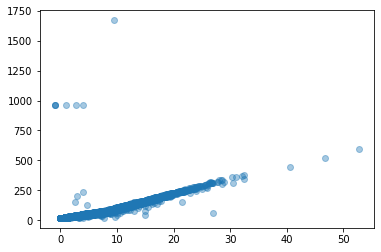

In [43]:
plt.scatter(df[['travel_distance']],df[['trip_fare']],alpha=0.4)
plt.show()

# 10. Create a scatterplot of travel_time and trip_fare:
# Is there a strong correlation?

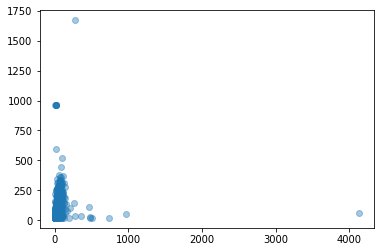

In [46]:
plt.scatter(df[['travel_time']],df[['trip_fare']],alpha=0.4)
plt.show()